In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


In [2]:
df = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
df.shape

(1059, 14)

In [5]:
df['systemic_crisis'].value_counts()

0    977
1     82
Name: systemic_crisis, dtype: int64

In [6]:
df.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [7]:
df.apply(lambda x:x.nunique())

case                                 13
cc3                                  13
country                              13
year                                155
systemic_crisis                       2
exch_usd                            772
domestic_debt_in_default              2
sovereign_external_debt_default       2
gdp_weighted_default                  6
inflation_annual_cpi               1022
independence                          2
currency_crises                       3
inflation_crises                      2
banking_crisis                        2
dtype: int64

In [8]:
df.groupby(['country'])['systemic_crisis'].value_counts()

country                   systemic_crisis
Algeria                   0                   81
                          1                    4
Angola                    0                   77
Central African Republic  0                   39
                          1                   19
Egypt                     0                  149
                          1                    6
Ivory Coast               0                   59
                          1                    4
Kenya                     0                   54
                          1                   13
Mauritius                 0                   68
Morocco                   0                   73
                          1                    2
Nigeria                   0                   50
                          1                   10
South Africa              0                  114
Tunisia                   0                   70
                          1                    5
Zambia                    0

In [9]:
df.groupby(['country'])['systemic_crisis'].count()

country
Algeria                      85
Angola                       77
Central African Republic     58
Egypt                       155
Ivory Coast                  63
Kenya                        67
Mauritius                    68
Morocco                      75
Nigeria                      60
South Africa                114
Tunisia                      75
Zambia                       72
Zimbabwe                     90
Name: systemic_crisis, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,1059.0,35.613787,23.692402,1.000000,15.000000,38.00000,56.000000,7.000000e+01
year,1059.0,1967.767705,33.530632,1860.000000,1951.000000,1973.00000,1994.000000,2.014000e+03
systemic_crisis,1059.0,0.077432,0.267401,0.000000,0.000000,0.00000,0.000000,1.000000e+00
exch_usd,1059.0,43.140831,111.475380,0.000000,0.195350,0.86840,8.462750,7.443061e+02
domestic_debt_in_default,1059.0,0.039660,0.195251,0.000000,0.000000,0.00000,0.000000,1.000000e+00
sovereign_external_debt_default,1059.0,0.152975,0.360133,0.000000,0.000000,0.00000,0.000000,1.000000e+00
gdp_weighted_default,1059.0,0.006402,0.043572,0.000000,0.000000,0.00000,0.000000,4.000000e-01
inflation_annual_cpi,1059.0,20848.892444,675727.429176,-28.502137,2.086162,5.76233,11.644048,2.198970e+07
independence,1059.0,0.776204,0.416984,0.000000,1.000000,1.00000,1.000000,1.000000e+00
currency_crises,1059.0,0.132200,0.349847,0.000000,0.000000,0.00000,0.000000,2.000000e+00


In [11]:
df['independence'].value_counts()

1    822
0    237
Name: independence, dtype: int64

In [12]:
df['year'].unique()

array([1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1962, 1963, 1964, 1965, 1966, 1967, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 19

In [13]:
df['year'].agg(['max','min'])

max    2014
min    1860
Name: year, dtype: int64

In [14]:
df['country'].value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [15]:
df[df['independence']==1]['year']

38      1968
39      1969
40      1970
41      1971
42      1972
        ... 
1054    2009
1055    2010
1056    2011
1057    2012
1058    2013
Name: year, Length: 822, dtype: int64

In [16]:
df[df['independence']==1]['year'].agg(['min','max'])

min    1860
max    2014
Name: year, dtype: int64

In [17]:
df['country'].unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [18]:
df['case'].unique()

array([ 1,  2, 10, 15, 19, 35, 38, 40, 45, 56, 63, 69, 70])

In [19]:
df['country'].nunique()

13

In [20]:
df['case'].nunique()

13

In [21]:
df["country"].replace({'Algeria':0, 'Angola':1, 'Central African Republic':2, 'Ivory Coast':3,
       'Egypt':4, 'Kenya':5, 'Mauritius':6, 'Morocco':7, 'Nigeria':8,'South Africa':9, 'Tunisia':10, 'Zambia':11, 'Zimbabwe':12},inplace = True)

In [22]:
df['country'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [23]:
df.drop(columns = ['case','year'],inplace =True)

In [24]:
df.shape

(1059, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3b4ceadd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3b4d0f450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3b4cdd050>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3b4d0fb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3b4d0fe50>],
 'means': []}

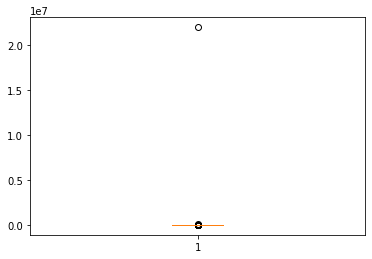

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.boxplot(df['inflation_annual_cpi'])

In [26]:
df['inflation_annual_cpi'].agg(['min','max'])

min   -2.850214e+01
max    2.198970e+07
Name: inflation_annual_cpi, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df[['inflation_annual_cpi']])
x

array([[1.45266002e-06],
       [1.93960038e-06],
       [1.12705117e-06],
       ...,
       [1.51989799e-06],
       [1.46532704e-06],
       [1.37037360e-06]])

In [29]:
x.min()

0.0

In [30]:
x.max()

1.0

In [31]:
df['infanncpi'] = x

In [32]:
df

,cc3,country,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,infanncpi
0,DZA,0,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,1.452660e-06
1,DZA,0,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,1.939600e-06
2,DZA,0,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,1.127051e-06
3,DZA,0,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,1.805663e-06
4,DZA,0,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,1.121141e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,ZWE,12,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis,9.473578e-07
1055,ZWE,12,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis,1.442453e-06
1056,ZWE,12,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis,1.519898e-06
1057,ZWE,12,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis,1.465327e-06


In [33]:
df.drop(columns=['inflation_annual_cpi'],inplace=True)

In [34]:
x = df.drop(columns = ['systemic_crisis'])
y=df['systemic_crisis']

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
x.drop(columns = ['cc3'],inplace=True)

In [37]:
x.replace({'crisis':1,'no_crisis':2},inplace=True)

In [38]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

In [39]:
from collections import Counter

In [40]:
Counter(y_smote)

Counter({1: 977, 0: 977})

In [41]:
Counter(x_smote)

Counter({'country': 1,
         'exch_usd': 1,
         'domestic_debt_in_default': 1,
         'sovereign_external_debt_default': 1,
         'gdp_weighted_default': 1,
         'independence': 1,
         'currency_crises': 1,
         'inflation_crises': 1,
         'banking_crisis': 1,
         'infanncpi': 1})

In [42]:
x_smote.shape

(1954, 10)

In [43]:
y_smote.shape

(1954,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=123)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**KNN**

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
ypred = knn.predict(x_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
cl = classification_report(y_test,ypred)
print(cl)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       203
           1       0.91      0.93      0.92       188

    accuracy                           0.92       391
   macro avg       0.92      0.92      0.92       391
weighted avg       0.92      0.92      0.92       391



**Naive Bayes**

In [51]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [52]:
ypred = nb.predict(x_test)

In [53]:
cl = classification_report(y_test,ypred)
print(cl)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       203
           1       0.98      0.95      0.96       188

    accuracy                           0.97       391
   macro avg       0.97      0.97      0.97       391
weighted avg       0.97      0.97      0.97       391



**SVM = Support Vector Machine**

In [54]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [55]:
ypred = svc.predict(x_test)

In [56]:
cl = classification_report(y_test,ypred)
print(cl)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       203
           1       0.75      0.47      0.58       188

    accuracy                           0.67       391
   macro avg       0.69      0.66      0.65       391
weighted avg       0.69      0.67      0.66       391



**Linear SVM**

In [57]:
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
ypred = svc.predict(x_test)

In [59]:
cl = classification_report(y_test,ypred)
print(cl)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       203
           1       0.98      0.97      0.97       188

    accuracy                           0.97       391
   macro avg       0.97      0.97      0.97       391
weighted avg       0.97      0.97      0.97       391

